In [1]:
import pandas as pd

In [2]:
#Load the dataset
twilight_bd1_labeled = pd.read_excel('9_labeled.xlsx')

In [3]:
# Cleaning data

# Rename column for consistency
twilight_bd1_labeled = twilight_bd1_labeled.rename(columns={"sentiment ": "sentiment"})

#Drop Row with missing values in columns sentiment and comment_body
twilight_bd1_labeled = twilight_bd1_labeled.dropna(subset=['sentiment', 'comment_body'])


#De-capitalize sentiment values
twilight_bd1_labeled['sentiment'] = twilight_bd1_labeled['sentiment'].str.lower()
# Remove leading and trailing whitespace from sentiment values
twilight_bd1_labeled['sentiment'] = twilight_bd1_labeled['sentiment'].str.strip()

# Ensure manually labeled sentiment is in the correct format
twilight_bd1_labeled['sentiment'] = twilight_bd1_labeled['sentiment'].replace({'positive ': "positive", 'negative ': "negative", 'neutral ': "neutral"})

In [4]:
# Initialize VADER 
# Predict: label sentiments using compound score

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    return "positive" if compound >= 0.05 else "negative" if compound <= -0.05 else "neutral"

#Run VADER on the labeled dataset
twilight_bd1_labeled["vader_sentiment"] = twilight_bd1_labeled["comment_body"].astype(str).apply(get_vader_sentiment)
# Save the labeled dataset with VADER predictions
twilight_bd1_labeled.to_excel('twilight_bd1_labeled_vader.xlsx', index=False)



VADER Accuracy: 0.5578

VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.47      0.56        85
     neutral       0.33      0.26      0.29        31
    positive       0.53      0.76      0.63        83

    accuracy                           0.56       199
   macro avg       0.52      0.50      0.49       199
weighted avg       0.57      0.56      0.55       199



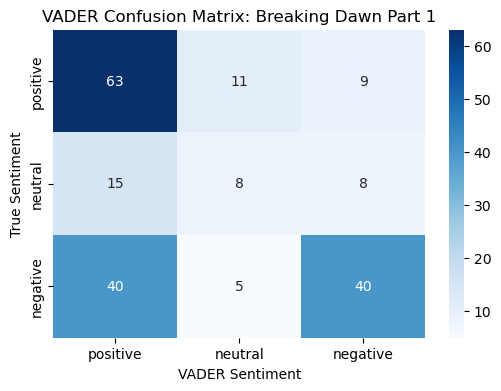

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate VADER's performance

#VADER Evaluation
valid_data = twilight_bd1_labeled.dropna(subset=['vader_sentiment'])
accuracy = accuracy_score(twilight_bd1_labeled['sentiment'], twilight_bd1_labeled['vader_sentiment'])
print(f"VADER Accuracy: {accuracy:.4f}")
print("\nVADER Classification Report:")
print(classification_report(valid_data['sentiment'], valid_data['vader_sentiment']))

# VADER Confusion Matrix
cm_vader = confusion_matrix(twilight_bd1_labeled['sentiment'], twilight_bd1_labeled['vader_sentiment'], labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_vader, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'neutral', 'negative'], yticklabels=['positive', 'neutral', 'negative'])
plt.title('VADER Confusion Matrix: Breaking Dawn Part 1')
plt.xlabel('VADER Sentiment')
plt.ylabel('True Sentiment')
plt.savefig('twilight_bd1_vader_confusion_matrix.png')    
plt.show()

